# Random numbers from Base Python

1. Module random from the base Python — It generates A SINGLE pseudo-random number
2. To generate an array of random numbers, the most efficient is to use the random module from numpy. 
3. Note that the two modules have the same name: random from base and random from numpy


1. If you need the density, cumulative function or quantile (and random numbers) use the stats module from the scipy package.
2. Besides these distributional functionals, it can also generate random numbers from a VERY LARGE number of distributions: discrete, continuous and multivariate.


## Outline of this notebook

1. We start with random from base (mostly copied from https://docs.python.org/3/library/random.html)
2. Move to explain random from numpy 
3. End with stats from scipy

In [ ]:
# Module random from base Python

import random

# Initialize the random number generator.
random.seed(123) # random.seed() uses the current system time

# Basic Algorithm

1. Python uses the Mersenne Twister as the core generator. 
2. It produces 53-bit precision floats and has a period of 2 to the power 19937-1. 
3. The underlying implementation in C is both fast and threadsafe. 
4. The Mersenne Twister is one of the most extensively tested random number generators in existence. 


# Sampling integers

In [23]:
## an integer from {0, 1,.., stop-1}
## USAGE: random.randrange(stop)
print(random.randrange(7))

# Generating an array with 20 random  integers from 0 to 11-1 
# A better way, a more efficient one, is explained in the next section using the random module from numpy 
x = [ random.randrange(11) for _ in range(30) ]
print( type(x) )
print(x)

# Selecting from {start, start+1, ..., stop-1}
# random.randrange(start, stop) (stop is optional)
x = [ random.randrange(3, 11) for _ in range(30) ]
print(x)

# Another option to select a random integer in {a, a+1, ..., b} (includes b) 
# random.randint(a, b)
# It is an alias for randrange(a, b+1).
print( random.randint(0, 10)) 

x = [ random.randint(2, 5) for _ in range(10) ]
print(x)

# Selecting from {start, start+step, start+2*step, ..., stop-1 } (in fact, the last start+k*step <= stop-1)
# random.randrange(start, stop, step)  (stop ans step are optional)
x = [ random.randrange(3, 11, 2) for _ in range(20) ]
print(x)

1
<class 'list'>
[5, 4, 4, 9, 8, 1, 1, 0, 10, 5, 5, 7, 7, 6, 2, 2, 3, 2, 10, 10, 5, 3, 7, 2, 10, 8, 3, 6, 5, 6]
[5, 7, 8, 9, 9, 3, 6, 10, 6, 6, 5, 8, 10, 8, 3, 10, 8, 10, 3, 6, 3, 7, 5, 7, 5, 10, 5, 5, 6, 5]
2
[4, 5, 5, 2, 5, 5, 4, 4, 3, 2]
[5, 9, 7, 3, 7, 5, 9, 7, 9, 9, 3, 3, 5, 5, 9, 9, 5, 3, 9, 3]


# Sampling from sequences

In [33]:
# Create a sequence (a python list) 
items = ['one', 'two', 'three', 'four', 'five']

# Select ONE random element from this list with equal probability
print( random.choice(items) )

# Select k elements WITH REPLACEMENT (note the ending 's' in choices)
print( random.choices(items , k=2) )

# Select k elements WITH REPLACEMENT and with probabilities proportional to a list of positive weights
w = [10, 5, 30, 5, 100]
x = random.choices(items, weights=w , k=10)
print( type(x))
print(x)

# Select k elements WITHOUT replacement. (k <= len(items)) No weights here.
random.sample(items, k=2)  

# Permuting a list 
y = random.sample(items, k=len(items)) 
print("Permuted items saved in new list y: ", y)

# Permuting in place (permuting and changing the original list) 
random.shuffle(items)
items

two
['four', 'three']
<class 'list'>
['five', 'five', 'five', 'three', 'three', 'one', 'five', 'five', 'five', 'two']
Permuted items saved in new list y:  ['five', 'two', 'one', 'three', 'four']


['four', 'three', 'five', 'one', 'two']

# Selecting from continuous intervals

In [43]:
# Sampling from continuous intervals 

# Sampling ONE single value in the interval [0,1)
# Function random selects a float from the continuous interval [0, 1)
print(random.random())

# Sampling some values from [0,1) (it is better to use the random module from numpy. See below)
x = [ random.random() for _ in range(10) ]

# Rounding these values to exhibit
rounded_x = [ round(elem, 3) for elem in x ]
print(rounded_x)

# We can sample from: uniform, normal, lognormal, negative exponential, gamma, beta, and von Mises. 
# Some examples:

# random.triangular(low, high, mode)
print( random.triangular(0,1,0.1))

# random.betavariate(alpha, beta)
print( random.betavariate(10, 20) )

# random.gauss(mu, sigma)
print(random.gauss(0,1))

# random.normalvariate(mu, sigma) : slower than gauss, the above function 
print( random.normalvariate(0, 1)  )                                                                                             

0.8653162277486719
[0.274, 0.501, 0.262, 0.666, 0.801, 0.463, 0.123, 0.465, 0.138, 0.99]
0.4162972144974141
0.3704151557823648
1.6957786065730736
1.7481644881712621


# Module random from numpy

This random module from NumPy is more flexible than the random module from the Base Python. 

It can immediately generate multi-dimensional arrays, .....



In [ ]:
import numpy as np
np.random.seed(444)
np.set_printoptions(precision=3)  # Output decimal fmt.

## Sampling integers with numpy

In [26]:
# Warnings: 
#   w1: function random_integers is deprecated. ---> Use randint instead
#   W2: function randint is almost like random_integers (it only does not include the final extreme)

# randint(low=a, high=b, size=n): Sampling n integers uniformly WITH REPLACEMENT from {a, a+1, a+2, ..., b-1} 
# (with a < b)    Note that b is **not** included
# This has the SAME syntax as the randint function from the Base Python random module

# Sampling 25 values from {2, 3, 4, 5}
x = np.random.randint(2, 5+1, 25)
print(type(x))   # it is a numpy array
print(x)

# randint(low, high): Sampling ONE single integer in {low, low+1, ..., high-1}
x = np.random.randint(5, 11)
print(type(x))   # an integer atom
print(x)

# randint(low, size=10): Sampling 10 integers with replacement from {1, ..., low-1}
print( np.random.randint(5, size=10))

# randint(low): Sampling ONE SINGLE integer from {1, ..., low-1}
# If high is None (the default), then results are from {1,2,..., low-1}. 
print( np.random.randint(5))

# randint(low, high, size=(n, m)): sampling n*m values from {low, ..., high-1} in array 2 x 4 
x = np.random.randint(2, 5+1, size=(2, 4))
print(type(x))   # it is a numpy array
print(x)


<class 'numpy.ndarray'>
[5 3 5 4 2 4 4 2 2 3 5 5 4 3 3 3 5 5 5 2 5 2 5 5 2]
<class 'int'>
10
[0 0 4 3 0 2 2 2 4 0]
2
<class 'numpy.ndarray'>
[[3 4 2 2]
 [4 5 3 5]]


# Sampling from sequences with numpy

In [32]:
# Sampling from sequences with numpy
# Function choice
# It is the **same** syntax from the Base Python random module

# numpy.random.choice(items, size=None, replace=True, p=None)
# items = 1-D array-like (of integers, floats or strings)

items = ['one', 'two', 'three', 'four', 'five']
x = np.random.choice(items, 10, replace=True, p=[0.1, 0.2, 0.3, 0.2, 0.2])
print(type(x))
print(x)

# Permuting a list with numpy
print( np.random.permutation([1, 4, 9, 12, 15]) )
print( np.random.permutation(items) )
print( np.random.permutation(10) ) # random permutation of the integers {0, 1,...,9} (starts at zero, ends at 10-1)

########################################
# The sample function from numpy is used to sample float. See below...

<class 'numpy.ndarray'>
['two' 'four' 'four' 'two' 'one' 'three' 'one' 'three' 'three' 'five']
[ 9 15 12  1  4]
['three' 'four' 'five' 'two' 'one']
[1 2 7 3 6 9 8 5 4 0]


# Sampling from continuous intervals 

In [ ]:
# Sampling from U(0,1)
# numpy.random.uniform(low=0.0, high=1.0, size=None)

x = np.random.uniform(low=0.0, high=1.0, size=(2,4))
print( type(x))
print( x) 

#########################################################################################
# Sampling from triangular distribution
# numpy.random.triangular(left, mode, right, size=None)
x = np.random.triangular(left=0.0, mode=0.1, right=1.0, size=(2,10))
print( type(x))
print( x) 

import matplotlib.pyplot as plt
h = plt.hist(np.random.triangular(-3, 0, 8, 100000), bins=200, density=True)
plt.show()

<class 'numpy.ndarray'>
[ 0.736  1.496  2.152 ...  0.061 -0.637  0.103]


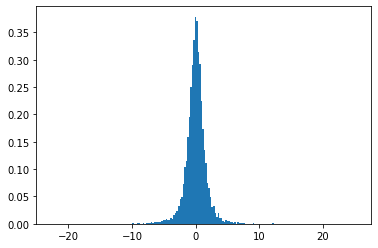

In [42]:
#########################################################################################
# Sampling from the Student's t-distribution with df degrees of freedom
# numpy.random.standard_t(df, size=None)

x = np.random.standard_t(df=3, size=10000)
print( type(x))
print( x) 

import matplotlib.pyplot as plt
h = plt.hist(x, bins=200, density=True)
plt.show()

# OBS: no docs oficial em 
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_t.html
# lemos esta afrimacao erronea
# So the p-value is about 0.009, which says the null hypothesis has a probability of about 99% of being true.

## More distributions in numpy

1. Gaussian: numpy.random.normal(loc=0.0, scale=1.0, size=None)
2. Pareto: numpy.random.pareto(a, size=None) (it has shape a. We sample X-mu where mu is the shift; values start at zero) 
3. F-noncentral: numpy.random.noncentral_f(dfnum, dfden, nonc, size=None)
4. Chi-2 noncentral: numpy.random.noncentral_chisquare(df, nonc, size=None)
5. numpy.random.negative_binomial(n, p, size=None)
6. Many others... BUT SEE WHAT WE CAN DO WITH SCIPY...NEXT

# Random numbers in SciPy

1. The random module in the numpy library only generates random variables from a limited number of distributions.
2. The scipy library versions will also provide useful functions related to the distribution, e.g. PDF, CDF and quantiles.
3. Probability distribution classes are located in the stats module of the scipy library: scipy.stats 


# Main methods

The main methods associated with probability distribution classes are:

1. rvs (random numbers), 
2. pdf, 
2. cdf, 
4. sf (survival function), 
5. ppf (quantile fcn or cdf inverse), 
6. stats (Mean, variance, skew, or kurtosis)

It returns numpy arrays

In [ ]:
import numpy as np

# Example: Gaussian or normal random variables: rvs(loc=0, scale=1, size=1, random_state=None)

import scipy.stats as stats

# Evaluating the normal density at one single point
fx = stats.norm.pdf(5.7, 3, 4) 
print("density of N(3,4) at the point 5.7 is ", fx)
print(type(fx), '\n')

# Evaluating the normal density at several points
fx = stats.norm.pdf([4.7, 5.7, 6.7], 3, 4) 
print("density of N(3,4) at the point 4.7, 5.7, and 6.7 is ", fx)
print(type(fx), '\n')

# Evaluating different normal densities, same sd, at several points
fx = stats.norm.pdf([4.7, 5.7, 6.7], [0, 3, 3],  4) 
print("density of N(0,4), N(3,4), and N(3,4) at the points 4.7, 5.7, and 6.7 is ", fx)
print(type(fx), '\n')

# Evaluating normal densities with different means and sds at several points
fx = stats.norm.pdf([4.7,5.7,6.7], [0, 3, 6.7], [1,4,1]) 
print("density of N(0,1), N(3,4), and N(6.7,1) at the points 4.7, 5.7, and 6.7 is ", fx)
print(type(fx), '\n')

# Generating Gaussin random variables
x = stats.norm.rvs(0, 1, 5) 
print("Sample of 5 values of N(0,1):", x)
print(type(x), '\n')

# Note a small inconsistency: the rvs function reqires loc and scale as its first arguments but other functions require 
# them after their other arguments: stats.norm.rvs(0, 1, 1000) but stats.norm.pdf(5.7, 0, 1)   

# We can omit the mean and sd if they are the default values BUT then we need to declare the size parameter 
x = stats.norm.rvs(size=5)
print("Sample of 5 values of N(0,1):", x)
print(type(x), '\n')

In [ ]:
# More statistics:

# cdf of N(loc, scale)=N(0,1) of some points
Fx = stats.norm.cdf([-2, -1, 0, 1, 1.96])
print("cdf of N(0,1) at the points -1, -1, 0, 1, and 2 is ", np.round(Fx, 3))
print(type(Fx), '\n')

# Statistics of a normal distribution: use the stats method
m, v, skew, kurt = stats.norm.stats(moments='mvsk')  # it is using the standard Gaussian
print('N(0,1) moments: Mean: ', m, ' , variance: ', v, ' , skewness: ', skew, ' , kurtosis: ', kurt, '\n')

m, v, skew, kurt = stats.norm.stats(loc=2, scale=4, moments='mvsk')  # passing other parameters
print('N(0,1) moments: Mean: ', m, ' , variance: ', v, ' , skewness: ', skew, ' , kurtosis: ', kurt, '\n')

qx = stats.norm.ppf([0.025, 0.5, 0.95, 0.975], loc=0, scale=1 )
print("percentiles of N(0,1) at the probabilities 0.025, 0.5, 0.95, and 0.975 are ", np.round(qx, 3))
print(type(qx), '\n')


In [ ]:
# Ploting the normal density on top of a normal sample histogram

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

x = np.linspace(-8, -2, 100)
r = stats.norm.rvs(loc=-5, scale=1, size=1000)

ax.plot(x, stats.norm.pdf(x, loc=-5, scale=1), 'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## Main univariate probability distributions and their parameterizations

SciPy has very large list of probability distribution functions. See complete list at: https://docs.scipy.org/doc/scipy/reference/stats.html

SciPy uses an unusual location-scale parametrization family, even for distributions that do not use loc-scale parametrization usually. 


| Distribution  | Parameters     | 10 r.v.'s using rvs                 | Example: pdf ou pmf             |
|-------------- |--------------- | ----------------------------------- | ------------------------------- | 
| U(a, b)       | a=loc,b-a=scale| stats.uniform.rvs(a, b-a, size=100) | stats.uniform.pdf(x, a, b-a)    |
| binom         | size, prob     | stats.binom.rvs(n, p, size=100)     | stats.binom.pmf(k, n, p)        |   
| poisson	    | mu             | stats.poisson.rvs(mu=1.5, size=100) | stats.poisson.pmf(2, mu=2.5)    |
| betabinom     | n, a, b        | stats.betabinom.rvs(n,a,b,size=7)   | stats.betabinom.rvs(k, n, a, b) |
| nbinom        | n=sucesses, p  | stats.nbinom.rvs(n, p, size=100)    | stats.nbinom.pmf(k, n, p, loc)  |                 
| hypergeom	    | M=tot,n=A,N=sam| stats.hypergeom.rvs(M, n, N, size=) | stats.hypergeom.pmf(k, M, n, N) |
| zipf          | a, loc         | stats.zipf.rvs(a, loc=0, size=100)  | stats.zipf.rvs(k, a, loc=0)     |  
| beta	        | a, b           | stats.beta.rvs(a, b, size=)         | stats.beta.pdf(x, a, b)         |
| normal        | loc, scale(sd) | stats.norm.rvs(loc, scale, size=100)| stats.norm.pdf(x, loc, scale)   |
| exp(lambda)   | scale=1/lambda | stats.expon.rvs(scale, size=100)    | stats.expon.pdf(x, scale)       |       
| gamma(a,b)	| a, shape=1/b   | stats.gamma.rvs(x, a, scale=, size=)| stats.gamma.pdf(x, a, scale=)   |
| pareto(b, loc)| b, loc         | stats.pareto.rvs(b, loc=1, size=100)| stats.pareto.pdf(x, b, loc=1)   |
| t             | df, loc, scale | stats.t.rvs(df,loc=0,scale=1,size=) | stats.t.rvs(x,df,loc=0,scale=1) |
| lognorm	    | sdlog          |                                     |                                 |
| cauchy        |                |                                     |                                 |
| chi2	        | df             |                                     |                                 |
| f 	        | df1, df2       |                                     |                                 |
| geom 	        | p              |                                     |                                 |
| invgamma      | shape          |                                     |                                 |
| logistic      |                |                                     |                                 |
| exponweib     | exponent, shape|                                     |                                 |
| randint (disc)| low, high      | stats.randint.rvs(0, 10, size=7)    | stats.randint.pmf(3, 0, 10)     |

In [ ]:
# Some examples:
# Poisson (parameter is mu, it is not the usual lambda)
x = stats.poisson.rvs(mu=2.5, size=10) # sampling 10 Poisson(2.5) values
print("Random sample of 10 values of Poisson(mu=2.5): ", x)

# Evaluating different Poisson probability mass function at some points
fx = stats.poisson.pmf([0, 1, 2, 3, 4], mu=2.5) 
print("probability function of Poisson(2.5) at the points 0:4 is ", np.round(fx,2))
print(type(fx), '\n')

x = np.arange(0, 11)
fx = stats.poisson.pmf(x, mu=2.5)
fig, ax = plt.subplots(1, 1)
ax.plot(x, fx, 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, fx, colors='b', lw=5, alpha=0.5)

In [ ]:
n, p = 20, 0.1
x = np.arange(0, 20)
fx = stats.binom.pmf(x, n, p)
fig, ax = plt.subplots(1, 1)
ax.plot(x, fx, 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, fx, colors='b', lw=5, alpha=0.5)

In [ ]:
# BetaBinomial: a binomial distribution with a probability of success p that follows a beta distribution.
# parameters: n=number of trials and and random p ~ Beta(a,b)

n, a, b = 10, 1, 9
x = stats.betabinom.rvs(n, a, b, size=7)

k = np.arange(0, 10)
fk = stats.betabinom.pmf(k, n, a, b)
fig, ax = plt.subplots(1, 1)
ax.plot(k, fk, 'bo', ms=8, label='betabinom pmf')
ax.vlines(k, 0, fk, colors='b', lw=5, alpha=0.5)

In [ ]:
# contrastando com a binomial

f2k = stats.binom.pmf(k, n, p=0.1)
fig, ax = plt.subplots(1, 1)
ax.plot(k, fk, 'bo', ms=8, label='betabinom pmf')
ax.vlines(k, 0, fk, colors='b', lw=5, alpha=0.5)
ax.plot(k+0.2, f2k, 'ro', ms=8, label='binom pmf')
ax.vlines(k+0.2, 0, f2k, colors='r', lw=5, alpha=0.5)

In [ ]:
# Distribuicao uniforme

fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 1, 100)
ax.plot(x, stats.uniform.pdf(x),'r-', lw=5, alpha=0.6, label='uniform pdf')

r = stats.uniform.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
# Exponential distribution
r = stats.expon.rvs(scale=10, size=1000) # simulating a sample with lambda = 1/scale = 0.1
x = np.linspace(0, 60, 100)

fig, ax = plt.subplots(1, 1)
ax.plot(x, stats.expon.pdf(x, scale=10), 'r-', lw=5, alpha=0.6, label='expon pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=30)
ax.legend(loc='best', frameon=False)
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1)
x = np.linspace(0, 3.5, 100)
ax.plot(x, stats.pareto.pdf(x, b=4.5),'r-', lw=5, alpha=0.6, label='pareto pdf')
r = stats.pareto.rvs(b=4.5, size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, bins=100)
ax.legend(loc='best', frameon=False)
plt.show()

# Nao ficou bom, fazer uns graficos com varias amostras variando b

Distributions have a general form and a "frozen" form. 

The general form is stateless: you supply the distribution parameters as arguments to every call. 

The frozen form creates an object with the distribution parameters set. 

For example, you could evaluate the PDF of a normal(3, 4) distribution at the value 5.7 by
```
stats.norm.pdf(5.7, 3, 4)
```    
or by 
```	
mydist = stats.norm(3, 4)
mydist.pdf(5.7)
```

In [ ]:
import math
from scipy import stats
A = stats.norm(3, math.sqrt(16)) # Declare A to be a normal random variable
print A.pdf(4)       # f(3), the probability density at 3
print A.cdf(2)       # F(2), which is also P(Y < 2)
print A.rvs()        # Get a random sample from A

## Main multivariate probability distributions 



Density at [1.3, 2.7]:  0.0016828369534797917
Density at 5 points:  [0.04826618 0.04259475 0.07475612 0.00950417 0.07022687]
CDF at [1.3, 2.7]:  0.7395808611024745
(500, 2)


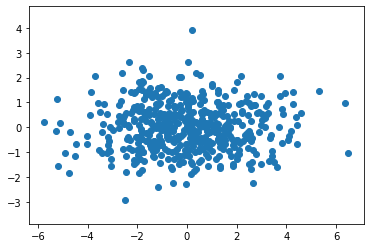

Text(0.5, 1.0, 'pdf')

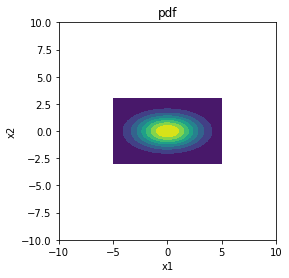

In [22]:
# Multivariate Gaussian distribution
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# using the frozen method
# First, create an object "containing" the distribution. Later, extract samples, density plots, etc
# Mean vector
mu = [0.0, 0.0]
# Covariance matrix
sigma = [[4.0, 0.0], [0.0, 1.0]]
# Distribution object (frozen method)
distrib = stats.multivariate_normal(mean=mu, cov=sigma)

# Evaluating the density in the point (1.3, 2.7)
print("Density at [1.3, 2.7]: ", distrib.pdf([1.3, 2.7]) )

# Evaluating at n=5 2-dim points
x = np.array([[0, 1], [1, 1], [0.5, 0.25], [1, 2], [-1, 0]])

dens = distrib.pdf(x)
print("Density at 5 points: ", dens) 

# Evaluating the CDF of the multivariate normal
print("CDF at [1.3, 2.7]: ", distrib.cdf([1.3, 2.7]))

# sampling 500 2-dim vectors from the population object pop ~ N_2(mu, sigma)
# using 12345 as a seed
samplex = distrib.rvs(size=500, random_state=12345) 
print( samplex.shape )

# Scatter plot with the sample generated 
plt.scatter(samplex[:,0], samplex[:,1])
plt.axis('equal')
plt.show()


# Density plot 
x1, x2 = np.mgrid[-5:5:.01, -3:3:.01]
pos = np.dstack((x1, x2))
z = distrib.pdf(pos)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal')
ax.contourf(x1,x2,z)
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('pdf')



C:\Users\assun\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


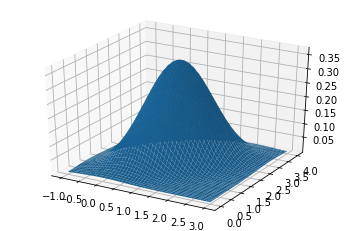

In [23]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
x = np.linspace(-1, 3, 100)
y = np.linspace(0, 4, 100)
X, Y = np.meshgrid(x, y)
pos = np.dstack((X, Y))
mu = np.array([1, 2])
cov = np.array([[.5, .25],[.25, .5]])
rv = multivariate_normal(mu, cov)
Z = rv.pdf(pos)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
fig.show()

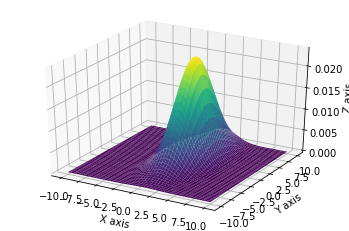

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
# Create grid and multivariate normal
x = np.linspace(-10,10,500)
y = np.linspace(-10,10,500)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y
# Create a frozen RV object
mean = np.array([1, 2])
cov  = np.array([[3,0],[0,15]])
rv = multivariate_normal(mean,cov)
# Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='viridis',linewidth=0)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()